In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
countries = gpd.read_file("countries.shp")
countries.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [3]:
# geometry column u baz alarak orta noktasını bulmak için "centroid " fonksiyonunu kullanırız.
country_centroid=countries.geometry.centroid
country_centroid.head()

<ipython-input-3-2486e59fb924>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  country_centroid=countries.geometry.centroid


0     POINT (117.27043 -2.22296)
1      POINT (109.69887 3.79239)
2    POINT (-71.36437 -37.74361)
3    POINT (-64.68475 -16.70688)
4     POINT (-74.37806 -9.15439)
dtype: geometry

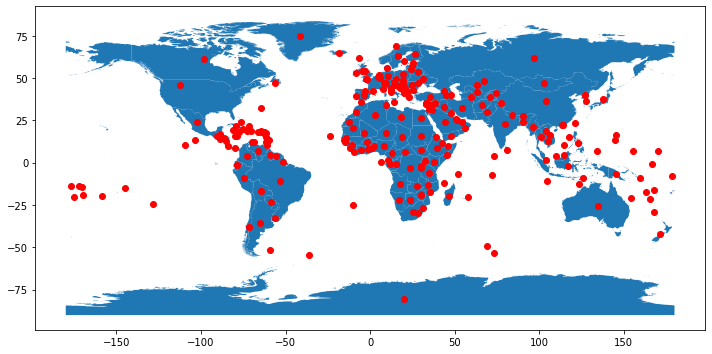

In [10]:
# subplot iki grafiği tek bir grafikte toplam için kullanılır.axis leri aynı vererek iki grafiği de üst üste getirdik.
# herbir ülke poligonunun orta noktasını kırmızı noktalar ile göstermiş bulumnaktayız.
fig, ax = plt.subplots(figsize= (12,10))
countries.plot(ax=ax)
country_centroid.plot(ax=ax,color="red")

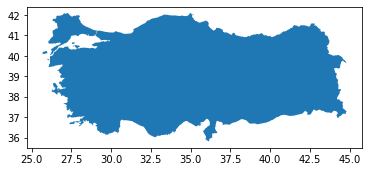

In [11]:
turkey= countries[countries["NAME"]=="Turkey"] # bu işlem pandasta basit bir filtreleme işlemidir.
turkey.plot()

In [14]:
turkey.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
turkey_centroid=turkey.geometry.centroid
turkey_centroid.head()

<ipython-input-15-d8b7a6068fc9>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  turkey_centroid=turkey.geometry.centroid


66    POINT (35.16724 39.06108)
dtype: geometry

In [16]:
turkey_centroid.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

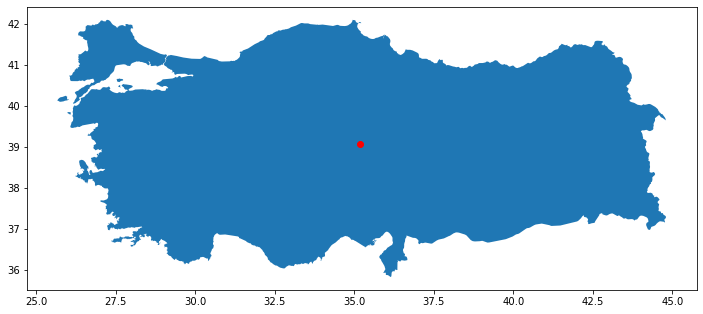

In [19]:
fig, ax = plt.subplots(figsize=(12,10))
turkey.plot(ax=ax)
turkey_centroid.plot(ax=ax, color="red")

<ipython-input-26-f7f83e8f38fd>:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  turkey_centroid_1degree= turkey_centroid.buffer(1)
<ipython-input-26-f7f83e8f38fd>:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  turkey_centroid_2degree= turkey_centroid.buffer(2)


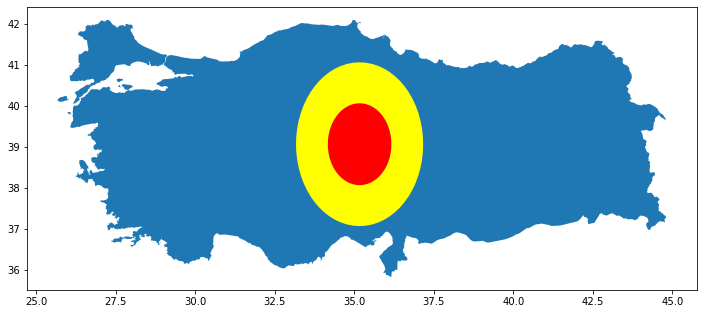

In [26]:
# Projeksiyon sistemimiz metre cinsinden değil derece cinsindendir.Bu yüzden yaratacağımız buffer da derece cinsinden olmalıdır.

# 1 ve 2 derecelik 2 tane buffer atadık , turkey_centroid ile.
turkey_centroid_1degree= turkey_centroid.buffer(1)
turkey_centroid_2degree= turkey_centroid.buffer(2)

# plot işlemleri :

fig, ax=plt.subplots(figsize=(12,10))
turkey.plot(ax=ax)
turkey_centroid_2degree.plot(ax=ax, color="yellow")
turkey_centroid_1degree.plot(ax=ax, color="red")
plt.show()

In [30]:
# metre cinsinden çalışmak istediğimiz için CRS değerimizi değiştiriyoruz ve projection olarak (epsg: 5259)
# artık cartesian coord. var ( metre cinsinden koordinatlar)

turkey_centroid_projected = turkey_centroid.to_crs('epsg:5259') # or you can write ({'init': 'epsg:5259'})
turkey_projected= turkey.to_crs('epsg:5259')
turkey_centroid_projected.crs

<Projected CRS: EPSG:5259>
Name: TUREF / TM45
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Turkey - east of 43.5°E
- bounds: (43.5, 36.97, 44.83, 41.02)
Coordinate Operation:
- name: Gauss-Kruger CM 45E
- method: Transverse Mercator
Datum: Turkish National Reference Frame
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

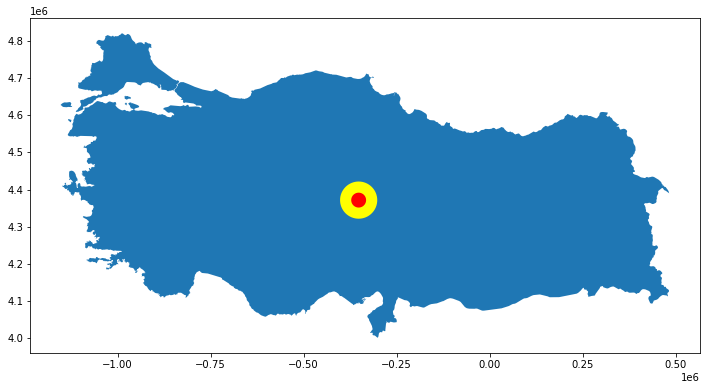

In [34]:
turkey_centroid_20km=turkey_centroid_projected.buffer(20000)
turkey_centroid_50km=turkey_centroid_projected.buffer(50000)

fig, ax=plt.subplots(figsize=(12,10))
turkey_projected.plot(ax=ax)
turkey_centroid_50km.plot(ax=ax, color="yellow")
turkey_centroid_20km.plot(ax=ax, color="red")
plt.show()